In [3]:
#IMPORTS


#import tqdm

#from bs4 import BeautifulSoup


In [1]:
# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import numpy as np
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
#To do Regex
import re

Twitter keys

API Key: l8K8SocntIKK1kFE9rUDJfwO8

API Secret: 36cWKxQ59gWK7twlKTXRBqOMA4DIv16zO0pjlBHgfxH4szCQAG

Bearer Token: AAAAAAAAAAAAAAAAAAAAAHWGfwEAAAAATNqL7vFiLYOENaicSGgIuJbnejI%3DFNW4rnpK7FpmBDZrCfNpsdMaVKvo5HKXHedygV4r7dJSbbgsSC

In [2]:
#Define Bearer token in the Windows OS Enviroment
os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAAHWGfwEAAAAATNqL7vFiLYOENaicSGgIuJbnejI%3DFNW4rnpK7FpmBDZrCfNpsdMaVKvo5HKXHedygV4r7dJSbbgsSC'

In [3]:
#Defining function that will fetch the token from the enviroment
def auth():
    return os.getenv('TOKEN')

In [4]:
#Defining function that will pass the token for authorization and return headers for use w. the API.
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

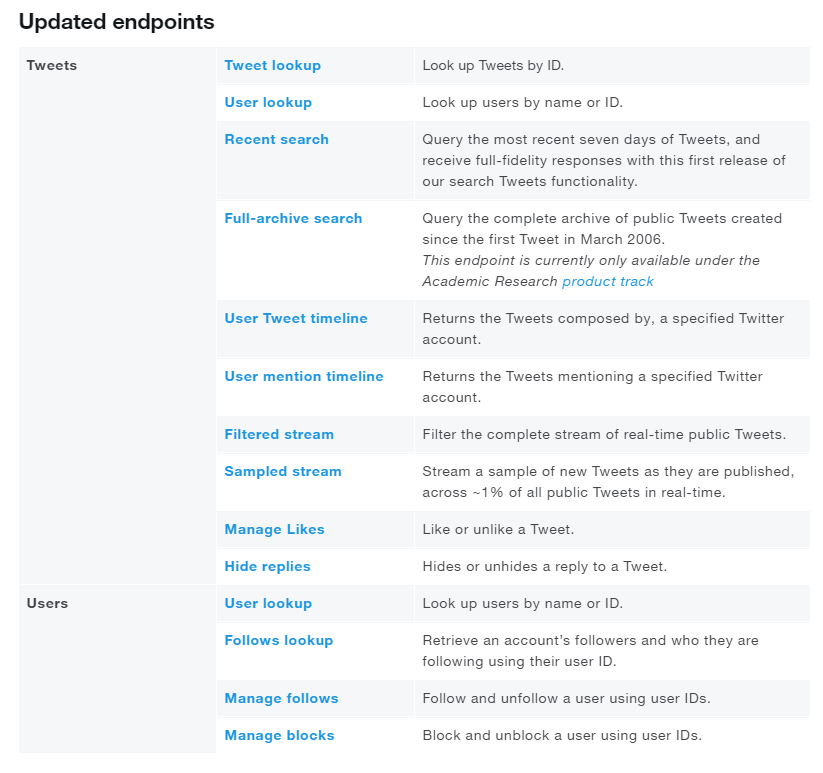

In [6]:
# Display example of printout
from IPython.display import Image
Image("TwitterAPI-endpoints.png", width=600)

In [7]:
def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/recent" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)


In [ ]:
# The function below will send the “GET” request and if everything is correct 
# (response code 200), it will return the response in “JSON” format.

def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()